# Predição de Valor de imóvel com *Regressão Linear*

In [48]:
#-- importando as libs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import numpy as np
%matplotlib inline 
sns.set(rc={'figure.figsize':(11.7,8.27)})

Vamos usar o [Boston Housing Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) para prever valores de imóveis em Boston 

In [49]:
#-- carregando o dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [50]:
#-- printando o dataset
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

O dataset vem em formato de dicionário - Precisamos transformar ele em DataFrame. Mas, antes vamos ver as descrições das variáveis. 

Como vejo as chaves de um dicionário?

In [51]:
#-- printando a chave do dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Vamos verificar a chave que descreve como o dataset está estruturado. É a chave `DESCR`.

In [52]:
#-- printando o descritivo do dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Transformar o dicionário em um dataframe:

In [53]:
#-- transformando o dicionário em dataframe
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Primeiro precisamos colocar a variável resposta no dataset

In [54]:
#-- incluinfo a variável resposta no dataset
boston_data['target'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
#-- verificando as dimensões do dataset
boston_data.shape

(506, 14)

A descrição não estava mentido. Existem 506 registros e 14 colunas. Fizemos tudo certo até aqui

Qual dessas variáveis parece ser a mais importante? Conseguimos fazer alguma coisa para testar como a nossa variável resposta se comporta com outras variáveis?

### Análise Exploratória dos Dados

 - Análise exploratória serve para desvendar um pouco do processo gerador de dados. Quanto mais você souber sobre como os dados são gerados, melhor será suas chances de usar a técnica de modelagem mais adequada. Algumas análises são padrões em todos os processos de análise exploratória:
1. Análise de distribuição. Ex: qual a média, mínimo e máximo de cada variável
2. Análise de dados faltantes. Ex: Quais variáveis têm dados faltantes? Qual a proporção de dados faltantes por variável? Porque esses dados estão faltando? É um bug ou uma característica do processo gerador de dados?
3. Variáveis categóricas. Existem variáveis categóricas? Qual a cardinalidade das variáveis categóricas? As categorias são ordenadas ou sem ordem?
4. Correlação. Qual a correlação entre variáveis?

Inicialmente vamos ver a descriçãode cada variável com o `describe`

In [59]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Quais variáveis são categóricas? Quais variáveis são numéricas?

Por enquanto vamos trabalhar só com os atributos em negrito. Mais especificamente, neste primeiro momento, vamos ver o atributo `RM` - o número de quartos

**Attribute Information (in order)** 

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - ** RM       average number of rooms per dwelling**
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - ** PTRATIO  pupil-teacher ratio by town **
 - B       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 
 - ** LSTAT lower status of the population **
 - MEDV     Median value of owner-occupied homes in $1000's

In [60]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [61]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

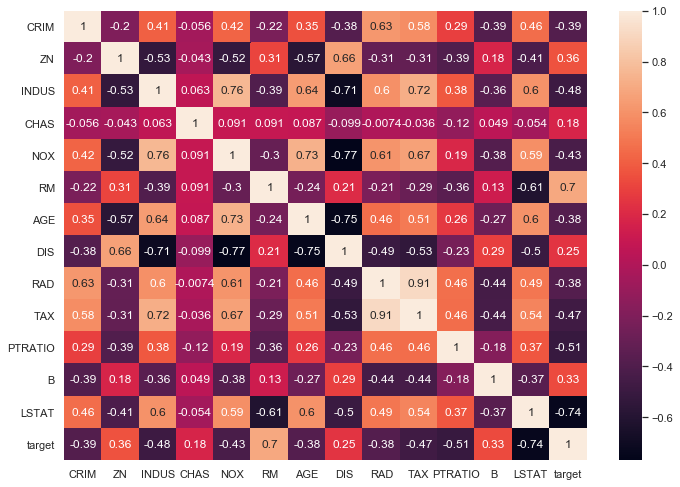

In [15]:
#-- correlação
_ = sns.heatmap(boston_data.corr(), annot=True)

## Passo_1: Ajustar um modelo de reg lin simples utilizando a variavel RM
## Statsmodel

Vamos testar a correlação dessa variável com o valor dos imóveis. <br>
Correlação de Pearson usando o método `corr` do pandas

In [62]:
boston_data.target.corr(boston_data.RM)

0.695359947071539

Agora vamos testar fazer um preditor de valor de imóveis usando apenas o número de quartos

Precisamos separar o dataset em treino e teste e também pegar a variável resposta

In [63]:
Y = boston_data['target']
X = boston_data.RM.to_frame()

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [65]:
#Usando a biblioteca statsmodels
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train) #adiciona a cte a base de dados
X_test_1 = sm.add_constant(X_test) #adiciona a cte a base de dados
est = sm.OLS(Y_train, X_train_1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     335.4
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           4.28e-53
Time:                        21:47:05   Log-Likelihood:                -1176.1
No. Observations:                 354   AIC:                             2356.
Df Residuals:                     352   BIC:                             2364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6623      3.170    -10.935      0.0

Qual a vantagem de conhecer a fórmula? 

Nesse modelo consiguimos ver que a cada número de quartos que aumenta o valor do imóvel cresce 9.11 pontos - Exatamente o valor do beta1[0].

Vamos fazer um modelo com outra variável agora. Agora vamos utilizar o **LSTAT - % lower status of the population**


## Passo_2: Ajustar um modelo de reg lin simples utilizando a variavel LSTAT
## Statsmodel

Correlação da variável com a resposta

In [66]:
# _ = sns.regplot(x="LSTAT", y="target", data=boston_data)
boston_data.target.corr(boston_data.LSTAT)

-0.7376627261740147

Definir novos X e Y

In [67]:
Y = boston_data['target']
X = boston_data.LSTAT.to_frame()

Dividir o dataset em treino e teste

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

Treinar o novo modelo

In [69]:
#Usando a biblioteca statsmodels

X_train_2 = sm.add_constant(X_train) #adiciona a cte a base de dados
est1 = sm.OLS(Y_train, X_train_2)
est12 = est1.fit()
print(est12.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     444.7
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           2.09e-64
Time:                        21:48:30   Log-Likelihood:                -1150.0
No. Observations:                 354   AIC:                             2304.
Df Residuals:                     352   BIC:                             2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.2656      0.669     52.701      0.0

Esse modelo é um pouco melhor que o anterior...

Vocês acham que é melhor fazer um modelo com uma variável ou com todas que eu tenho?

## Passo_3: Ajustar um modelo de reg lin multipla utilizando as variaveis RM, PTRATIO e LSTAT
## Statsmodel

Existe uma maneira de fazer a correlação com todas as variáveis possíveis?

In [70]:
important_vars = boston_data[['RM', 'PTRATIO', 'LSTAT']]

In [71]:
corr = important_vars.corr()

In [72]:
corr

,RM,PTRATIO,LSTAT
RM,1.000000,-0.355501,-0.613808
PTRATIO,-0.355501,1.000000,0.374044
LSTAT,-0.613808,0.374044,1.000000


In [73]:
Y = boston_data['target']
X = important_vars

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [75]:
#Usando a biblioteca statsmodels

X_train_3 = sm.add_constant(X_train) #adiciona a cte a base de dados
est2 = sm.OLS(Y_train, X_train_3)
est22 = est2.fit()
print(est22.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     253.7
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           1.98e-87
Time:                        21:49:43   Log-Likelihood:                -1090.1
No. Observations:                 354   AIC:                             2188.
Df Residuals:                     350   BIC:                             2204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1191      4.603      3.937      0.0

Esse modelo é melhor ou pior que os anteriores? Qual o melhor modelo?

## Passo_4: Ajustar um modelo de reg lin multipla utilizando todas as variaveis
## Statsmodel

### Primeiro vamos dar uma olhada nas correlações

In [76]:
corr = boston_data.corr()

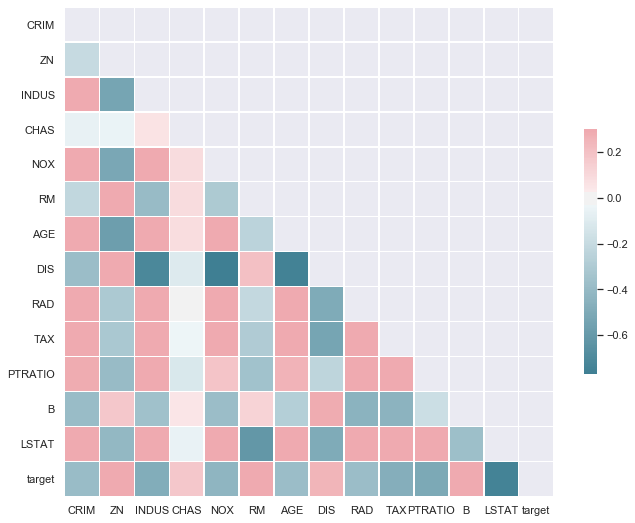

In [77]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Com essa matriz nos já podemos ter uma ideia de quais variáveis são mais interessantes do que outras.

Caso a gente fique com variáveis altamente correlacionadas podemos entrar em um problema de multicolinearidade. Quais variáveis podemos remover?


In [78]:
Y = boston_data['target']
X = boston_data.drop('target', axis=1)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [80]:
#Usando a biblioteca statsmodels

X_train_4 = sm.add_constant(X_train) #adiciona a cte a base de dados
est3 = sm.OLS(Y_train, X_train_4)
est32 = est3.fit()
predictions = est32.predict(X_train_4) 
residuos = Y_train - predictions
print(est32.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           4.96e-92
Time:                        21:52:31   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

### Vamos remover variáveis correlacionadas

In [81]:
Y = boston_data['target']
X = boston_data.drop(['target', 'AGE', 'INDUS', 'NOX'], axis=1)

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [93]:
#Usando a biblioteca statsmodels

X_train_5 = sm.add_constant(X_train) #adiciona a cte a base de dados
est4 = sm.OLS(Y_train, X_train_5)
est42 = est4.fit()
predictions = est42.predict(X_train_5) 
residuos = Y_train - predictions
print(est42.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     94.42
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           3.53e-92
Time:                        22:00:11   Log-Likelihood:                -1060.5
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     343   BIC:                             2186.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8372      5.085      3.901      0.0

## Passo_5: Ajustar o modelo do passo 4
## Sklearn

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

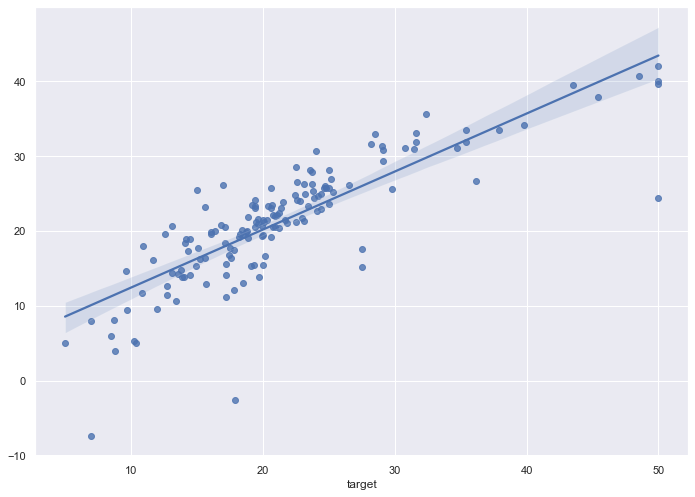

In [86]:
_ = sns.regplot(x=Y_test, y=Y_pred)

In [87]:
beta1=lm.coef_
intercepto=lm.intercept_
print(beta1)
print(intercepto)

[-0.12307705  0.04312983  2.86659568  4.0333325  -0.97469774  0.21640583
 -0.01098738 -0.72958638  0.01210042 -0.60597633]
19.83718412834539


In [88]:
X_test.iloc[0]

CRIM         0.09178
ZN           0.00000
CHAS         0.00000
RM           6.41600
DIS          2.64630
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
B          395.50000
LSTAT        9.04000
Name: 173, dtype: float64

In [89]:
Y_pred[0]

28.150729276635992

In [90]:
intercepto + (beta1[0] * X_test.iloc[0][0]) + (beta1[1] * X_test.iloc[0][1]) + (beta1[2] * X_test.iloc[0][2])

19.82588811629711

In [91]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

22.852284045303133


In [92]:
#Calculando o R^2
sklearn.metrics.r2_score(Y_test, Y_pred)

0.6933118417488223

## Outros desafios usando Regressão

 - [Kaggle: a first experience on Machine Learning and Regression Challenges](https://medium.com/@pramos/kaggle-a-first-experience-on-machine-learning-and-regression-challenges-446436901b7e)
 - [Predicting House Prices Playground Competition: Winning Kernels](http://blog.kaggle.com/2017/03/29/predicting-house-prices-playground-competition-winning-kernels/)